In [56]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


# Tourist Carrying Capacity (TCC) - Linear Programming (LP) Formulation

In [90]:
import pandas as pd
from datasets_tourism import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

What kind of questions can we pose related to parking slots?

# Setup timeframe

In [520]:
START_DATE = "2023-07-01"
END_DATE= "2023-08-31"

# Dati Parcheggi

In [7]:
def parcheggi_timeframe(start_date, end_date):
    statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
    statistiche_parcheggi_molveno_timeframe_df = statistiche_parcheggi_molveno_df[
        (statistiche_parcheggi_molveno_df["date"] >= start_date) & 
        (statistiche_parcheggi_molveno_df["date"] <= end_date)
    ]
    return statistiche_parcheggi_molveno_timeframe_df

statistiche_parcheggi_molveno_timeframe_df = parcheggi_timeframe(START_DATE, END_DATE)
statistiche_parcheggi_molveno_timeframe_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
335,2.0,3.0,2.0,3.0,2.0,0.0,4.0,5.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,2023-06-27
336,0.0,1.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,2023-06-28
337,1.0,1.0,1.0,3.0,2.0,6.0,8.0,6.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,2023-06-29
338,1.0,1.0,2.0,1.0,0.0,2.0,4.0,3.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,2023-06-30
339,0.0,4.0,3.0,3.0,3.0,4.0,8.0,4.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


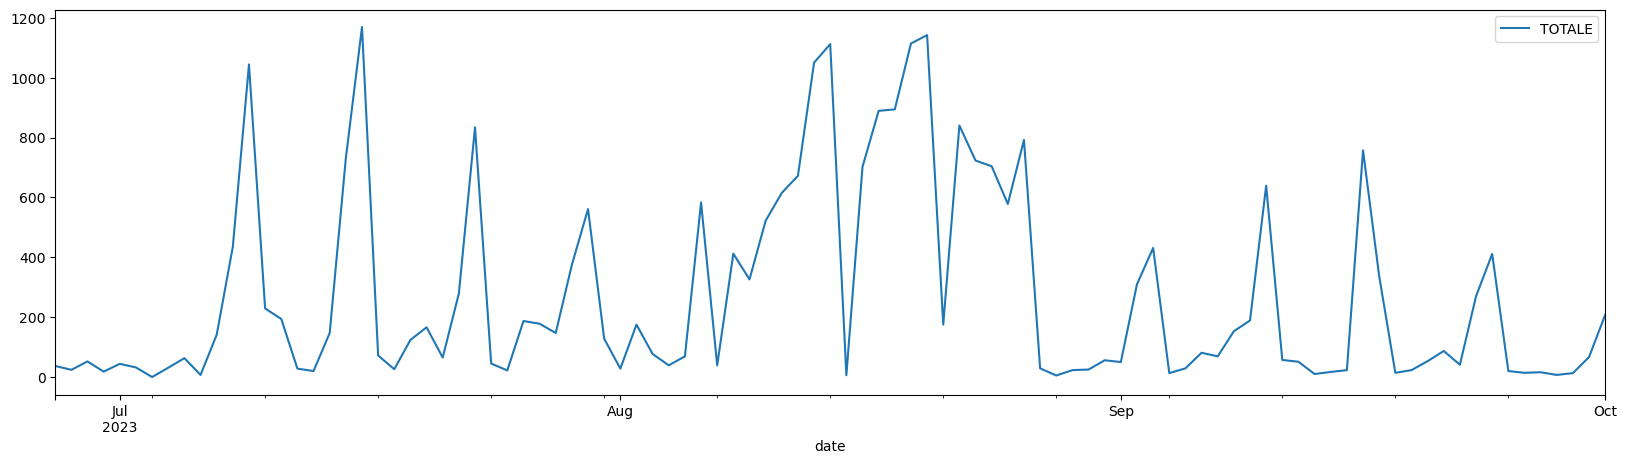

In [8]:
statistiche_parcheggi_molveno_timeframe_df.plot(y=["TOTALE"], x="date", figsize=(20,5))
plt.show()

In [25]:
columns = statistiche_parcheggi_molveno_timeframe_df.columns
num_cols = columns[:-1]
statistiche_parcheggi_molveno_timeframe_df[num_cols] = statistiche_parcheggi_molveno_timeframe_df[num_cols].astype("int")
statistiche_parcheggi_molveno_timeframe_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
335,2,3,2,3,2,0,4,5,8,6,...,0,0,0,0,0,0,0,0,37,2023-06-27
336,0,1,2,2,2,1,5,3,3,2,...,0,0,0,0,0,0,0,0,24,2023-06-28
337,1,1,1,3,2,6,8,6,6,5,...,0,0,0,0,0,0,0,0,52,2023-06-29
338,1,1,2,1,0,2,4,3,1,1,...,0,1,0,0,0,0,0,0,18,2023-06-30
339,0,4,3,3,3,4,8,4,3,12,...,0,0,0,0,0,0,0,0,44,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0,2,1,1,0,1,1,3,3,2,...,0,0,0,0,0,0,0,0,16,2023-09-27
428,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,2023-09-28
429,0,0,0,0,2,0,1,1,2,5,...,0,0,1,0,0,0,0,0,13,2023-09-29
430,0,4,2,7,5,4,9,13,6,9,...,0,0,0,0,0,0,0,0,67,2023-09-30


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [83]:
X = statistiche_parcheggi_molveno_timeframe_df[["6 ORE"]]
y = statistiche_parcheggi_molveno_timeframe_df['TOTALE']
X

,6 ORE
335,6
336,2
337,5
338,1
339,12
...,...
427,2
428,0
429,5
430,9


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

31.496614902919646
[7.060698]


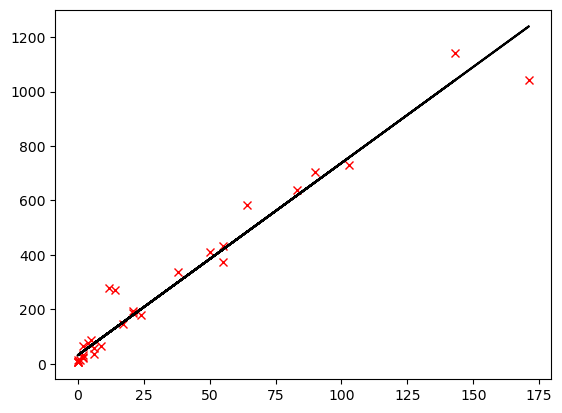

In [86]:
y_pred = linear_regressor.predict(X_test) # make predictions
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

Now we are able to mathematically express the model:

[first equation of the LP formulation]    total_cars = 31 + 7*(6_ore_field)

## Multiple Linear Regression

In [63]:
X = statistiche_parcheggi_molveno_timeframe_df.drop(["TOTALE", 'date'], axis=1)
y = statistiche_parcheggi_molveno_timeframe_df['TOTALE']
X

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,22 ORE,23 ORE,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI
335,2,3,2,3,2,0,4,5,8,6,...,0,0,0,0,0,0,0,0,0,0
336,0,1,2,2,2,1,5,3,3,2,...,0,0,0,0,0,0,0,0,0,0
337,1,1,1,3,2,6,8,6,6,5,...,0,0,0,0,0,0,0,0,0,0
338,1,1,2,1,0,2,4,3,1,1,...,0,0,0,1,0,0,0,0,0,0
339,0,4,3,3,3,4,8,4,3,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0,2,1,1,0,1,1,3,3,2,...,0,0,0,0,0,0,0,0,0,0
428,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,2,0,1,1,2,5,...,0,0,0,0,1,0,0,0,0,0
430,0,4,2,7,5,4,9,13,6,9,...,1,0,0,0,0,0,0,0,0,0


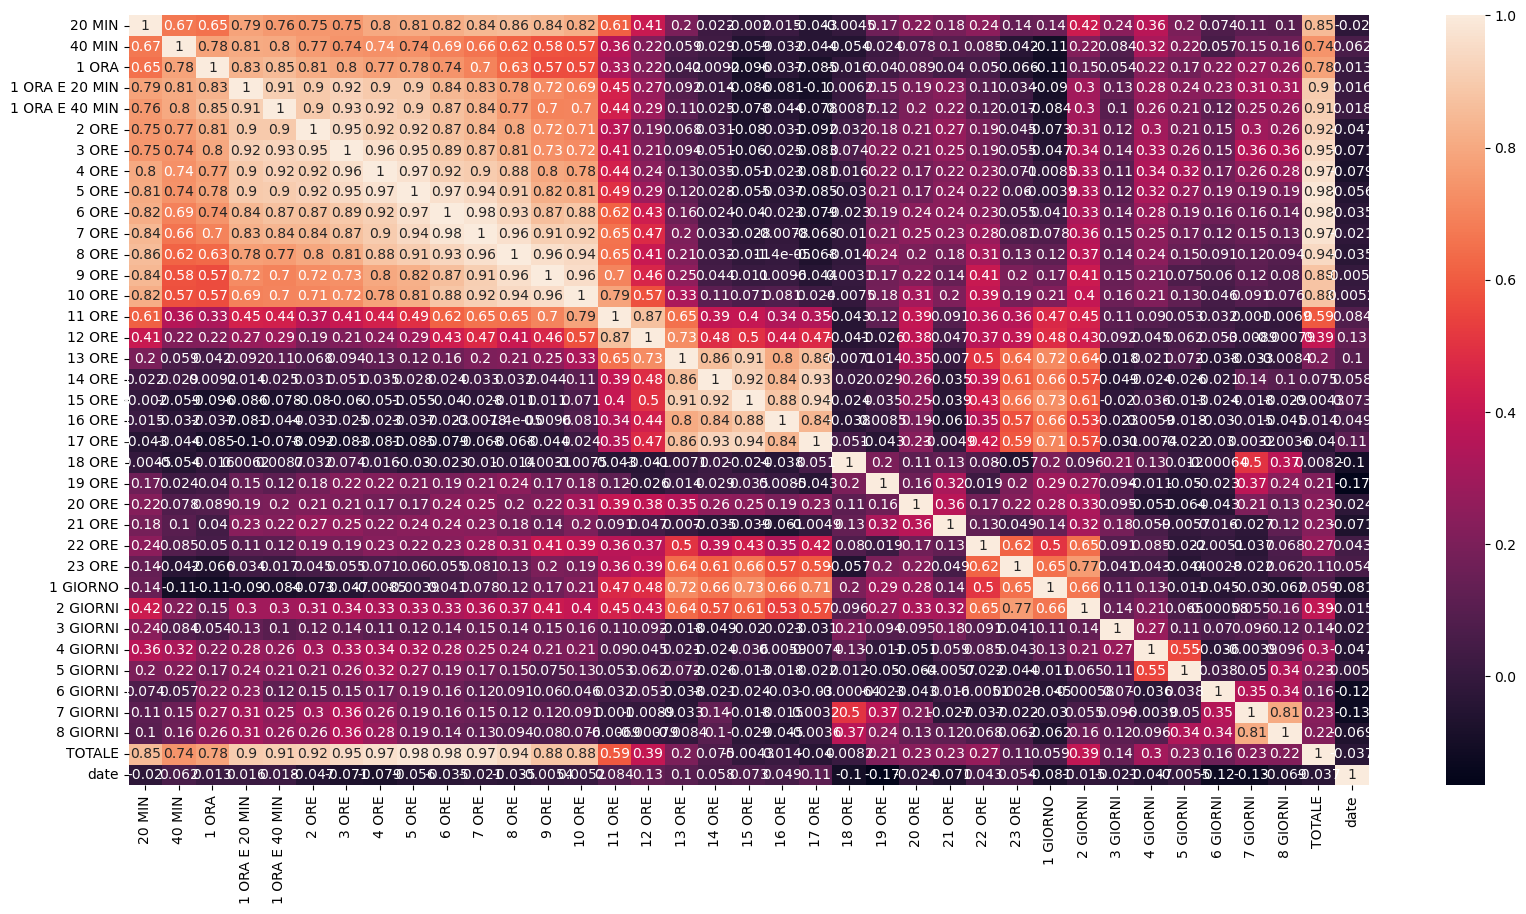

In [64]:
plt.figure(figsize = (20, 10))
sns.heatmap(statistiche_parcheggi_molveno_timeframe_df.corr(), annot = True)
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

1.7053025658242404e-13
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [67]:
y_pred = linear_regressor.predict(X_test) # make predictions
y_pred

array([ 583.,  270.,  639., 1142.,   14.,  147.,   24.,   32.,   14.,
        178.,   87.,  704.,  375.,  194.,  187.,   57.,  431.,   37.,
          5., 1044.,    7.,    6.,  411.,  731.,  337.,   77.,   67.,
         23.,  279.,   65.])

# Time Varying Analysis

## Time-varying Correlation

Capturing dynamic changes of time-varying correlation structure is scientifically important in spatio-temporal data analysis.
- **Pearson Correlation**: Also known as linear correlation, Pearson correlation measures the strength and direction of a linear relationship between two continuous variables. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.
- **Spearman Correlation**: Spearman correlation measures the monotonic relationship between two variables. It assesses the strength and direction of association between the ranks of variables rather than their actual values. Spearman correlation is suitable for ordinal or non-normally distributed data.
- **Kendall Correlation**: Kendall correlation, also known as Kendall’s tau coefficient, measures the ordinal association between two variables. It evaluates the similarity of the orderings of data points between two variables and is robust to outliers and non-normally distributed data.


# Dati Vodafone

In [129]:
vodafone_attendences_df

,date,locType,locId,userCountry,userProfile,userCluster,value
0,2022-01-01,AL_2,22,ALB,COMMUTER,None,0
1,2022-01-01,AL_2,22,ALB,TOURIST,None,862
2,2022-01-01,AL_2,22,ALB,VISITOR,None,44
3,2022-01-01,AL_2,22,AND,TOURIST,None,0
4,2022-01-01,AL_2,22,AND,VISITOR,None,0
...,...,...,...,...,...,...,...
4584498,2024-03-31,TN_MKT_POI,STAZ_TREN,SRB,VISITOR,UE,0
4584499,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,TOURIST,UE,0
4584500,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,VISITOR,UE,0
4584501,2024-03-31,TN_MKT_POI,STAZ_TREN,USA,TOURIST,None,0


In [431]:
LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_COMUNE_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"

attendances_timeframe_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_APT_MOLVENO) | 
         (vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO) | 
         (vodafone_attendences_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2949873,2023-06-27,TN_MKT_AL_3,27,AUT,TOURIST,A,25
2949875,2023-06-27,TN_MKT_AL_3,27,BEL,TOURIST,B,18
2949880,2023-06-27,TN_MKT_AL_3,27,CZE,TOURIST,CZ,47
2949881,2023-06-27,TN_MKT_AL_3,27,CZE,VISITOR,CZ,25
2949882,2023-06-27,TN_MKT_AL_3,27,DEU,TOURIST,DE,317
...,...,...,...,...,...,...,...
3629027,2023-10-01,TN_MKT_POI,LAGO_MOLV,FIN,TOURIST,UE,32
3629033,2023-10-01,TN_MKT_POI,LAGO_MOLV,ISR,VISITOR,None,18
3629036,2023-10-01,TN_MKT_POI,LAGO_MOLV,ITA,TOURIST,IT,803
3629037,2023-10-01,TN_MKT_POI,LAGO_MOLV,ITA,VISITOR,IT,1227


In [428]:
attendances_timeframe_df["userProfile"].value_counts()

userProfile
TOURIST    4100
VISITOR    3064
Name: count, dtype: int64

## Calculate tourists and visitors ratio

In [486]:
def calculate_tourist_excursionist_rate(total, tourists, excursionists):
    t_ratio = tourists/total
    e_ratio = excursionists/total
    return f"Tourists: {t_ratio}, Excursionists: {e_ratio}"

### Visitors rate in 'Comune Molveno'

In [487]:
visitors_comune_molveno_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO))
]
visitors_comune_molveno_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2949873,2023-06-27,TN_MKT_AL_3,27,AUT,TOURIST,A,25
2949875,2023-06-27,TN_MKT_AL_3,27,BEL,TOURIST,B,18
2949880,2023-06-27,TN_MKT_AL_3,27,CZE,TOURIST,CZ,47
2949881,2023-06-27,TN_MKT_AL_3,27,CZE,VISITOR,CZ,25
2949882,2023-06-27,TN_MKT_AL_3,27,DEU,TOURIST,DE,317
...,...,...,...,...,...,...,...
3625793,2023-10-01,TN_MKT_AL_3,27,GBR,VISITOR,UK,18
3625796,2023-10-01,TN_MKT_AL_3,27,ISR,VISITOR,None,61
3625799,2023-10-01,TN_MKT_AL_3,27,ITA,TOURIST,IT,860
3625800,2023-10-01,TN_MKT_AL_3,27,ITA,VISITOR,IT,1968


#### The ratio of tourists to excursionists in 'Comune Molveno'

In [488]:
visitors_comune_molveno_df.groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,313060
VISITOR,303628


In [489]:
tourists = visitors_comune_molveno_df.groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_comune_molveno_df.groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.5076473030122202, Excursionists: 0.4923526969877799


#### The ratio of tourists to excursionists in 'Comune Molveno' on day '15-08-2024'

In [490]:
visitors_comune_molveno_df[visitors_comune_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,4848
VISITOR,8808


In [491]:
tourists = visitors_comune_molveno_df[visitors_comune_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_comune_molveno_df[visitors_comune_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.35500878734622143, Excursionists: 0.6449912126537786


### Visitors rate in 'Lago Molveno'

In [521]:
visitors_lago_molveno_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
visitors_lago_molveno_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2981649,2023-07-01,TN_MKT_POI,LAGO_MOLV,AUT,TOURIST,A,18
2981657,2023-07-01,TN_MKT_POI,LAGO_MOLV,CZE,TOURIST,CZ,58
2981658,2023-07-01,TN_MKT_POI,LAGO_MOLV,CZE,VISITOR,CZ,47
2981659,2023-07-01,TN_MKT_POI,LAGO_MOLV,DEU,TOURIST,DE,195
2981660,2023-07-01,TN_MKT_POI,LAGO_MOLV,DEU,VISITOR,DE,57
...,...,...,...,...,...,...,...
3429874,2023-08-31,TN_MKT_POI,LAGO_MOLV,GBR,TOURIST,UK,32
3429880,2023-08-31,TN_MKT_POI,LAGO_MOLV,ITA,TOURIST,IT,1727
3429881,2023-08-31,TN_MKT_POI,LAGO_MOLV,ITA,VISITOR,IT,1187
3429888,2023-08-31,TN_MKT_POI,LAGO_MOLV,NLD,TOURIST,NL,44


<AxesSubplot: xlabel='date'>

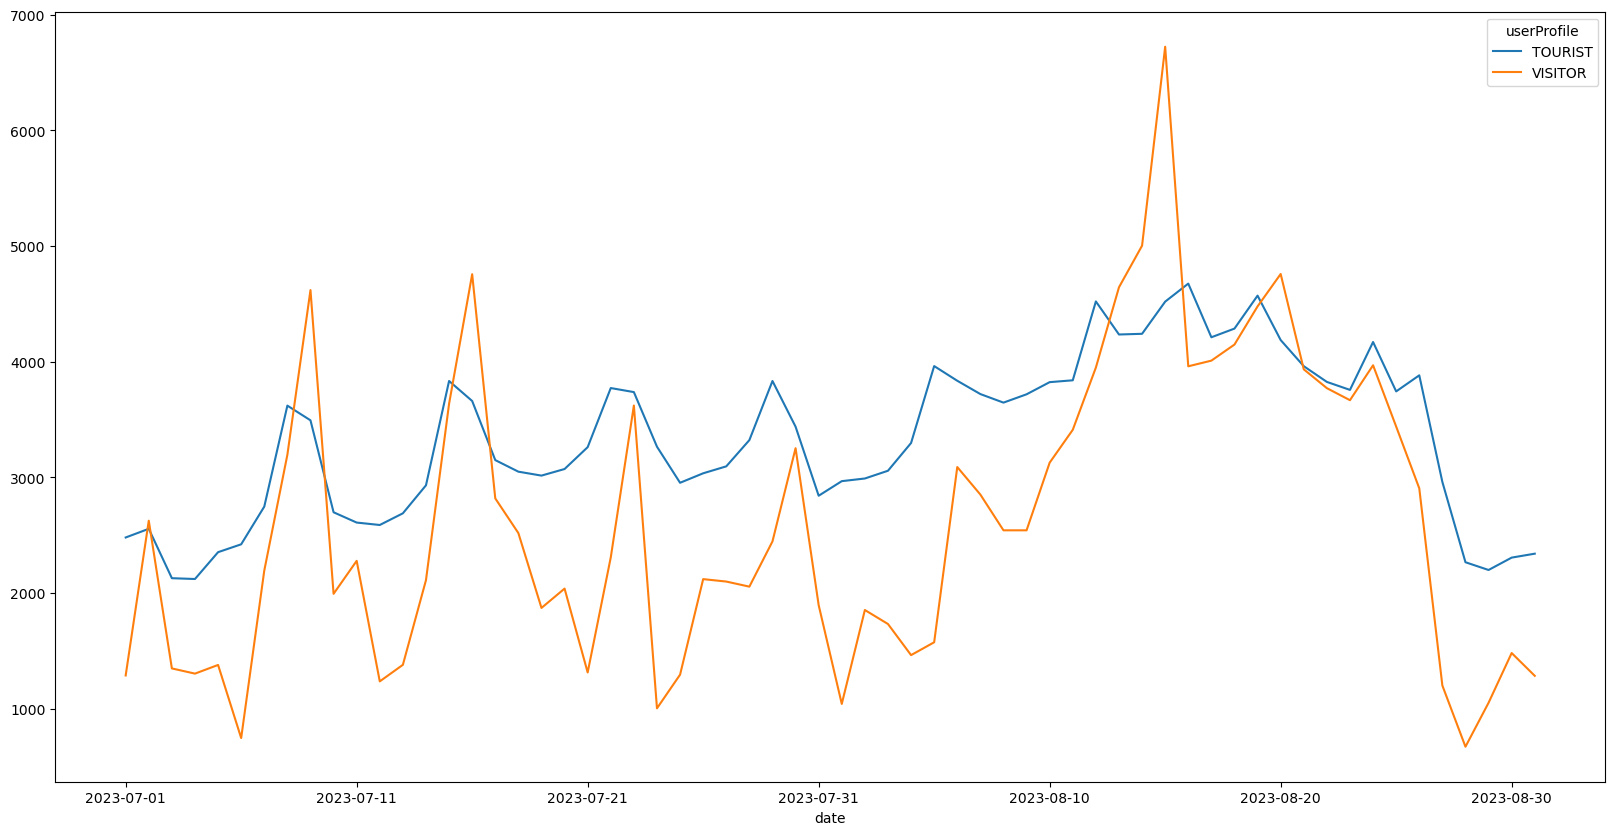

In [522]:
visitors_lago_molveno_df.groupby(["date", "userProfile"]).sum().unstack().plot(y="value", figsize=(20, 10))

#### The ratio of tourists to excursionists in 'Spiaggia di Molveno'

In [495]:
visitors_lago = visitors_lago_molveno_df.groupby(["userProfile"])[["value"]].sum()
visitors_lago

value
userProfile date             
TOURIST     2023-06-27   1492
            2023-06-28   1665
            2023-06-29   1809
            2023-06-30   1926
            2023-07-01   2480
...                       ...
VISITOR     2023-09-27    671
            2023-09-28    747
            2023-09-29    562
            2023-09-30   1057
            2023-10-01   1447

[194 rows x 1 columns]

In [496]:
tourists = visitors_lago.groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_lago.groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.5691629244749956, Excursionists: 0.43083707552500433


#### The ratio of tourists to excursionists in 'Spiaggia di Molveno' on day '15/08/2023'

In [517]:
visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["date"])[["value"]].sum()

,value
date,
2023-08-15,11242


In [498]:
visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,4519
VISITOR,6723


In [499]:
tourists = visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.40197473759117597, Excursionists: 0.598025262408824


In [472]:
attendances_timeframe_df.groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,1735039
VISITOR,1597679


In [135]:
tourists = attendances_timeframe_df.groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
visitors = attendances_timeframe_df.groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]

In [469]:
tot = tourists + visitors
tourists_rate = tourists/ tot
visitors_rate = visitors / tot

result = calculate_tourist_excursionist_rate(tot, tourists_rate, visitors_rate)

print(f"total number of visitors: {tot}")
print(f"tourists rate is: {result[0]}")
print(f"visitors rate is: {result[1]}")

total number of visitors: 3332718
tourists rate is: 1.5621117784362658e-07
visitors rate is: 1.4384421238140899e-07


In [513]:
attendances_timeframe_df.groupby("date").sum("value").reset_index().sort_values(by=["value"], ascending=False)

,date,value
49,2023-08-15,55354
48,2023-08-14,52307
53,2023-08-19,51852
52,2023-08-18,51159
47,2023-08-13,51098
...,...,...
92,2023-09-27,19705
91,2023-09-26,19306
89,2023-09-24,19107
90,2023-09-25,18453


In [86]:
attendances_timeframe_df2 = attendances_timeframe_df[["date", "value"]]

<AxesSubplot: xlabel='date'>

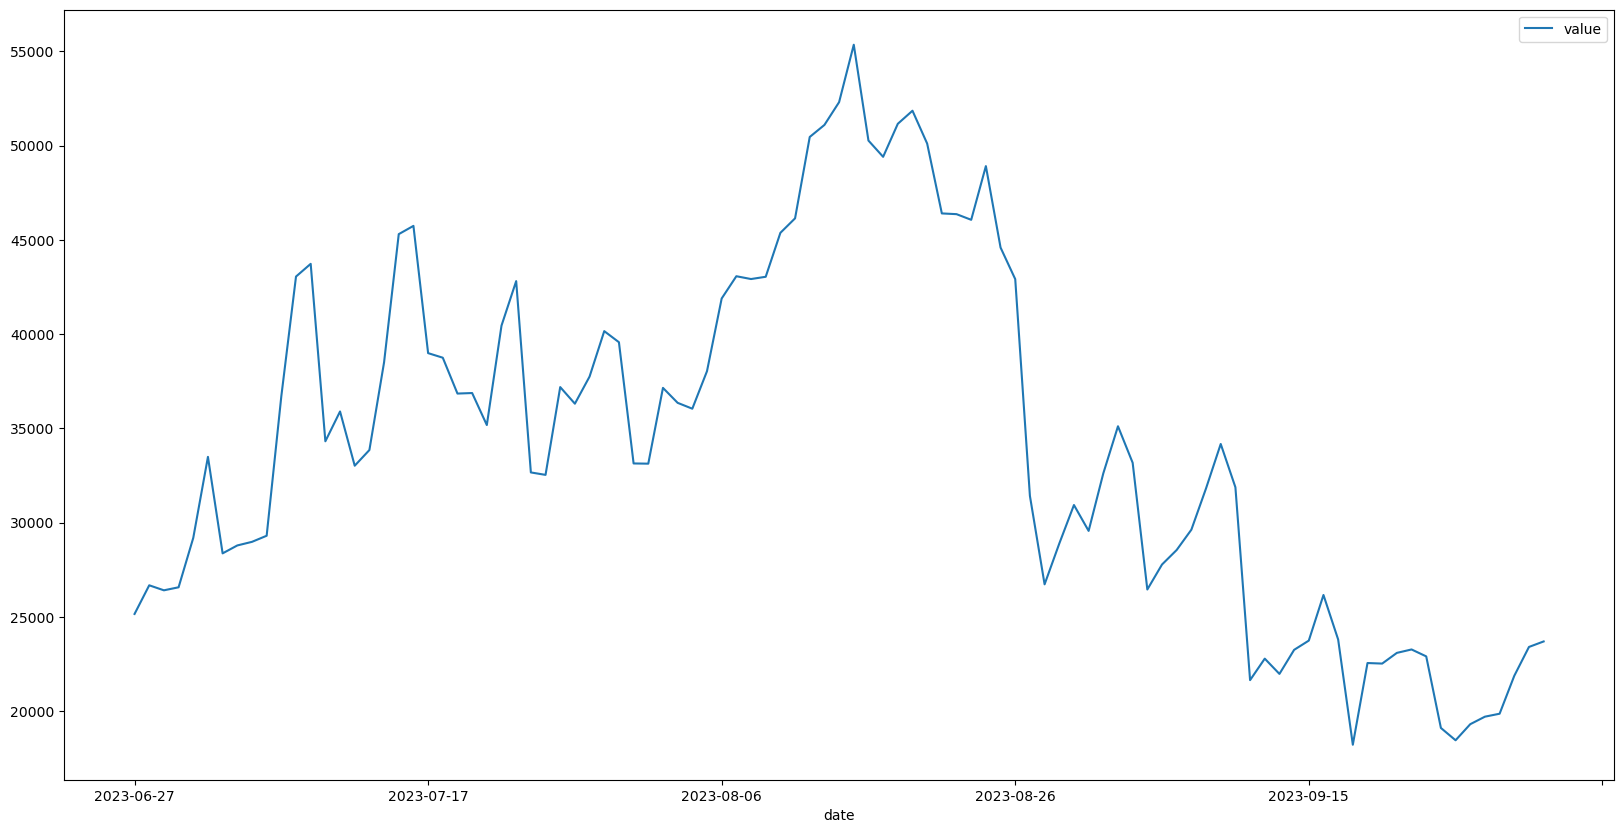

In [87]:
ax=None
attendances_timeframe_df2.groupby("date").sum("value").reset_index().plot(ax=ax, x="date", y="value", figsize=(20, 10))

In [89]:
statistiche_parcheggi_molveno_timeframe_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
335,2.0,3.0,2.0,3.0,2.0,0.0,4.0,5.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,2023-06-27
336,0.0,1.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,2023-06-28
337,1.0,1.0,1.0,3.0,2.0,6.0,8.0,6.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,2023-06-29
338,1.0,1.0,2.0,1.0,0.0,2.0,4.0,3.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,2023-06-30
339,0.0,4.0,3.0,3.0,3.0,4.0,8.0,4.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


In [114]:
attendances_timeframe_df2.groupby("date").sum("value")

,value
date,
2023-06-27,25154
2023-06-28,26675
2023-06-29,26409
2023-06-30,26569
2023-07-01,29190
...,...
2023-09-27,19705
2023-09-28,19862
2023-09-29,21874


In [117]:
parcheggi_vodafone_df = pd.concat([
    statistiche_parcheggi_molveno_timeframe_df[["TOTALE", "date"]].set_index("date").rename(columns={'TOTALE':'parcheggi'}),
    attendances_timeframe_df2.groupby("date").sum("value").rename(columns={'value':'presenze_vodafone'})
])
parcheggi_vodafone_df["presenze_vodafone"] = parcheggi_vodafone_df["presenze_vodafone"].fillna(0).astype("int")
parcheggi_vodafone_df["parcheggi"] = parcheggi_vodafone_df["parcheggi"].fillna(0).astype("int")
parcheggi_vodafone_df

,parcheggi,presenze_vodafone
date,,
2023-06-27 00:00:00,37,0
2023-06-28 00:00:00,24,0
2023-06-29 00:00:00,52,0
2023-06-30 00:00:00,18,0
2023-07-01 00:00:00,44,0
...,...,...
2023-09-27,0,19705
2023-09-28,0,19862
2023-09-29,0,21874


# Example of Linear Programming

Linear programming: minimize a linear objective function subject to linear
    equality and inequality constraints.
    linprog() solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥)

In [118]:
from scipy.optimize import linprog
import numpy as np

A_ub = np.array([[7, -12, 5], 
                 [-5, 2, 1], 
                 [-4, 15, -10]]
               )
b_ub = np.array([14, 12, -50])
c = np.array([-4, 9, -1])

linprog(c=c, A_ub=A_ub, b_ub=b_ub)


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 18.205882352941163
              x: [ 1.029e+00  3.588e+00  9.971e+00]
            nit: 4
          lower:  residual: [ 1.029e+00  3.588e+00  9.971e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-4.103e+00 -3.132e+00 -2.265e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

We see that the solution vector we obtain is x=(1.03, 3.59, 9.98) with optimum value 18.21.

## Venezia LP example

Text(0, 0.5, '$y$')

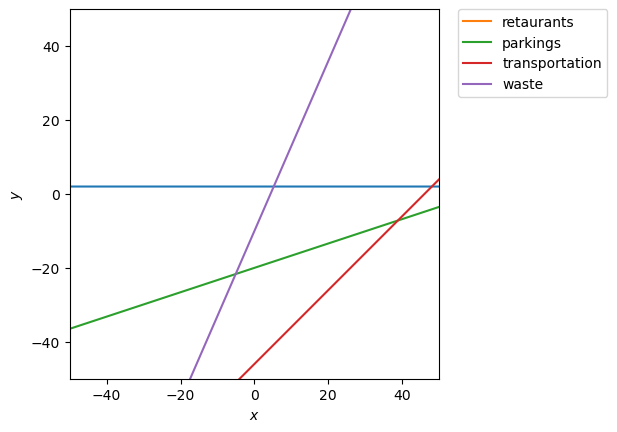

In [395]:
# plot the feasible region
d = np.linspace(-50,50,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=2) & (y<=0.75*x - 24) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int), 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(-50, 50, 2000)

#0.75*T + 0.65*E ,= 24000
# E = (24000 - 0.75 * T) / 0.65
restaurants = 0.75*x - 24000
parkings = 0.33*x -20
transportation = x - 46
waste = 2.3 * x - 10

# Make plot
plt.plot(x, 2*np.ones_like(x))

plt.plot(x, restaurants, label=r'retaurants')
plt.plot(x, parkings, label=r'parkings')
plt.plot(x, transportation, label=r'transportation')
plt.plot(x, waste, label=r'waste')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


# Formulate LP model for Molveno

We want to maximize the number of TOURISTS and VISITORS (referring to the vodafone dataset), subject to the constraint(s) of the parking slots

In [409]:
!pip -qq install pulp

In [410]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [411]:
#Define the object of the model
problem = LpProblem("LP model", LpMaximize)

Spaces are not permitted in the name. Converted to '_'


In [412]:
#Define the decision variables
T = LpVariable("T", 0)
E = LpVariable("E", 0)

In [413]:
#Define the objective function
problem += 0.6*T + 0.4*E

In [414]:
print(f"{0.7/4*T + 0.3/4*x <= 1192}")
print(f"{(1192 - 0.7/4*T) / (0.3/4)}")

0.175*T <= 1192.0000000000002
-2.3333333333333335*T + 15893.333333333334


In [464]:
# Define the constraints
#problem += 0.2/4*T + 0.8/4*E <= 1257, "parkings constraint3"
problem += 0.05*T + 0.2*E <= 1257, "parkings constraint41"
# E = (1257 - 0.05T ) / 0.2 = 6285 - 0.05*T

#problem += 0.7/4*T + 0.3/4*E <= 1192, "transportations constraint3"
problem += 0.175*T + 0.075*E <= 24196, "transportations constraint41"
# E = (1192 - 0.175T) / 0.075 = 15893 - 2.3*T

#problem += 0.6*T + 0.2*E <= 4676, "beach constraint3"
problem += 0.6*T + 0.2*E <= 4676, "beach constraint14"
# E = (4676 - 0.6T) / 0.2 = 23380 - 3*T

#problem += T <= 2743, "accomodation constraint3"
problem += T <= 2743, "tourists constraint41"


In [465]:
problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/65b3eb6dc0ab4561b7569a6a4fde423c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/65b3eb6dc0ab4561b7569a6a4fde423c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 30 RHS
At line 39 BOUNDS
At line 40 ENDATA
Problem MODEL has 8 rows, 2 columns and 14 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-6) rows, 2 (0) columns and 4 (-10) elements
0  Obj -0 Dual inf 0.999998 (2)
1  Obj 3885.5
Optimal - objective value 3885.5
After Postsolve, objective 3885.5, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 3885.5 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

In [502]:
solution={}
for v in problem.variables():
    print(f"{v.name} = {v.varValue}")
    solution[f"{v.name}"] = f"{v.varValue}"
print(solution)    

E = 5599.25
T = 2743.0
{'E': '5599.25', 'T': '2743.0'}


In [507]:
type(solution["E"])

str

In [508]:
print(int(float(solution["E"])))

5599


In [418]:
value(problem.objective)

3885.5

In [419]:
max_parkings = 6285
max_beach = 23380

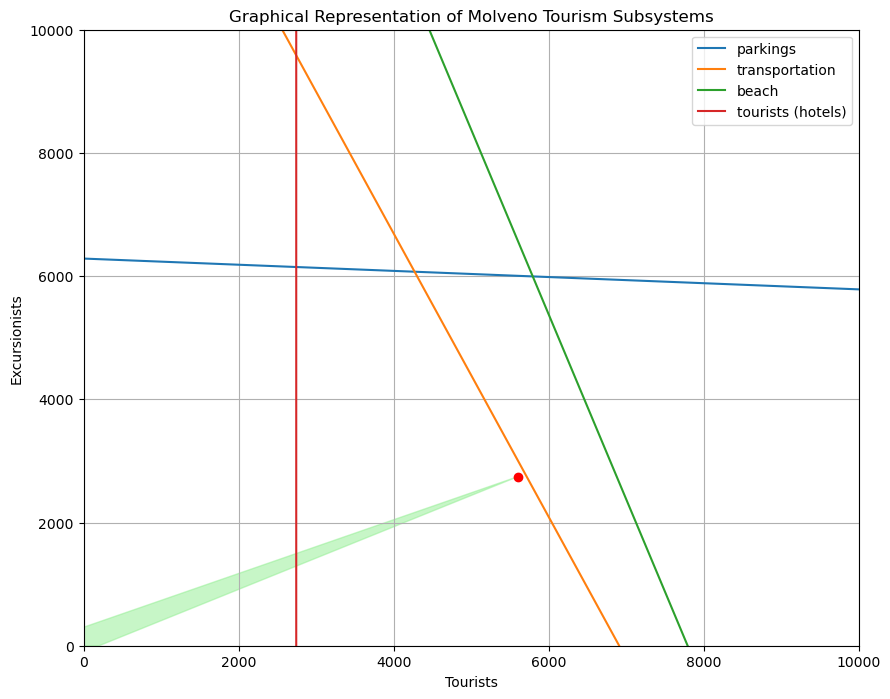

In [509]:
def plot_solution(max_parkings, max_beach):
    x = np.arange(0, 10000)

    plt.figure(figsize=(10, 8))
    plt.plot(x, max_parkings - 0.05 * x, label = "parkings")
    plt.plot(x, 15893 - 2.3 * x, label = "transportation")
    plt.plot(x, max_beach - 3 * x, label = "beach")
    plt.plot(2743*np.ones_like(x), x, label = "tourists (hotels)")

    plt.fill(
        [0, 0, 5599, 200],
        [0,300, 2743, 0],
        color='lightgreen', alpha=0.5
    )
    plt.plot(int(float(solution["E"])), int(float(solution["T"])), marker='o', color='red')

    plt.xlabel("Tourists")
    plt.ylabel("Excursionists")
    plt.title('Graphical Representation of Molveno Tourism Subsystems')
            
    plt.axis([0, 10000, 0, 10000])
    plt.grid(True)    
    plt.legend()
    #plt.show()
plot_solution(max_parkings, max_beach)

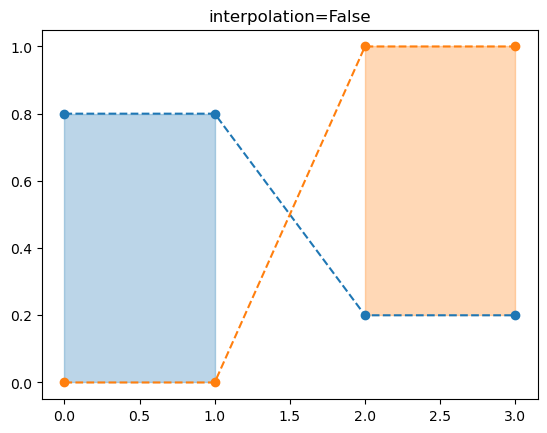

In [510]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, ax1 = plt.subplots(1, 1, sharex=True)

ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
ax1.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

#fig.tight_layout()

## Adding Interactive Controls for 'What-if' Scenarios

In [511]:
max_beach

23380

In [518]:
import ipywidgets as widgets

max_parkings_slider = widgets.IntSlider(value=max_parkings, min=100, max=7000, step=100, description='Max capacity parkings')
max_beach_slider = widgets.IntSlider(value=max_beach, min=100, max=7000, step=100, description='Max capacity beach')

def compute(max_parkings, max_beach):
    try:
        plot_solution(max_parkings, max_beach)
    except:
        pass

widgets.interactive(
    compute,
    max_parkings=max_parkings_slider.value,
    max_beach=max_beach_slider.value
)

interactive(children=(IntSlider(value=6285, description='max_parkings', max=18855, min=-6285), IntSlider(value…

## Time-varying what-if scenarios (TODO)

In [386]:
parameters_dataset = pd.DataFrame(data=[   
    {"month":"July", "subsystem": "parkings", "coefficient_name": "excusionists_rate", "coefficient_value": 0.8, "max_capacity": 1257},
    {"month":"July", "subsystem": "parkings", "coefficient_name": "tourists_rate", "coefficient_value": 0.2, "max_capacity": 1257},
    {"month":"July", "subsystem": "parkings", "coefficient_name": "cars_people_excusrionists", "coefficient_value": 3, "max_capacity": 1257},
    {"month":"July", "subsystem": "parkings", "coefficient_name": "cars_people_tourists", "coefficient_value": 3, "max_capacity": 1257},
    
    {"month":"August", "subsystem": "parkings", "coefficient_name": "excusionists_rate", "coefficient_value": 0.8, "max_capacity": 1257},
    {"month":"August", "subsystem": "parkings", "coefficient_name": "tourists_rate", "coefficient_value": 0.2, "max_capacity": 1257},
    {"month":"August", "subsystem": "parkings", "coefficient_name": "cars_people_excusrionists", "coefficient_value": 3, "max_capacity": 1257},
    {"month":"August", "subsystem": "parkings", "coefficient_name": "cars_people_tourists", "coefficient_value": 3, "max_capacity": 1257},
    
    {"month":"September", "subsystem": "parkings", "coefficient_name": "excusionists_rate", "coefficient_value": 0.8, "max_capacity": 1000},
    {"month":"September", "subsystem": "parkings", "coefficient_name": "tourists_rate", "coefficient_value": 0.2, "max_capacity": 1000},
    {"month":"September", "subsystem": "parkings", "coefficient_name": "cars_people_excusrionists", "coefficient_value": 3, "max_capacity": 1000},
    {"month":"September", "subsystem": "parkings", "coefficient_name": "cars_people_tourists", "coefficient_value": 3, "max_capacity": 1000}
])
parameters_dataset

,month,subsystem,coefficient_name,coefficient_value,max_capacity
0,July,parkings,excusionists_rate,0.8,1257
1,July,parkings,tourists_rate,0.2,1257
2,July,parkings,cars_people_excusrionists,3.0,1257
3,July,parkings,cars_people_tourists,3.0,1257
4,August,parkings,excusionists_rate,0.8,1257
5,August,parkings,tourists_rate,0.2,1257
6,August,parkings,cars_people_excusrionists,3.0,1257
7,August,parkings,cars_people_tourists,3.0,1257
8,September,parkings,excusionists_rate,0.8,1000
9,September,parkings,tourists_rate,0.2,1000


In [393]:
parameters_dataset[parameters_dataset["month"] == "July"]

,month,subsystem,coefficient_name,coefficient_value,max_capacity
0,July,parkings,excusionists_rate,0.8,1257
1,July,parkings,tourists_rate,0.2,1257
2,July,parkings,cars_people_excusrionists,3.0,1257
3,July,parkings,cars_people_tourists,3.0,1257


## Check constaints validity

In [ ]:
b T_B  * T +  b E_B * E <= 4676
